In [ ]:
# fixing issues with new data

In [38]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [39]:
# Load the data from CSV
df = pd.read_csv('hourly_sales.csv')

# Convert 'Date' column to datetime type and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.rename(columns={' Sales':'Sales'}, inplace=True)

df.head()

,Sales
Date,
1970-01-01 00:00:00.000044562,159.934283
1970-01-01 00:00:00.000044562,149.308721
1970-01-01 00:00:00.000044562,158.345023
1970-01-01 00:00:00.000044562,168.781870
1970-01-01 00:00:00.000044562,158.242608


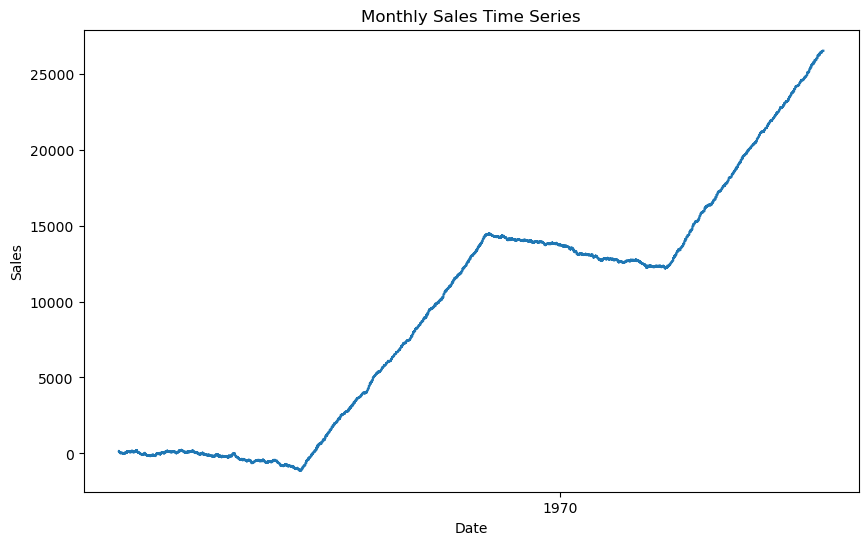

In [40]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['Sales'])
plt.title('Monthly Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [33]:
# Perform seasonal decomposition to check for trends and seasonality
decomposition = seasonal_decompose(df, model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [ ]:
# Plot the components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df['Sales'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Perform Augmented Dickey-Fuller test to check for stationarity
result = adfuller(df['Sales'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])

In [ ]:
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

In [ ]:
# Fit SARIMA model
model = SARIMAX(df['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast sales for the next 12 months
forecast = results.forecast(steps=12)

In [ ]:
# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Sales'], label='Original')
plt.plot(forecast, label='Forecast')
plt.title('Monthly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()